In [2]:
#import pandas as pd to read the file
import pandas as pd

## Getting Data


In [3]:
# Read "turnover.csv" and save it in a DataFrame called data
data=pd.read_csv("https://assets.datacamp.com/production/course_6221/datasets/turnover.csv")

## EDA

In [4]:
#first 5 rows
data.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
#information on the types of variables in data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction            14999 non-null float64
evaluation              14999 non-null float64
number_of_projects      14999 non-null int64
average_montly_hours    14999 non-null int64
time_spend_company      14999 non-null int64
work_accident           14999 non-null int64
churn                   14999 non-null int64
promotion               14999 non-null int64
department              14999 non-null object
salary                  14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Understand Catagorical Variable

In [6]:
# Print the unique values of the "department" column
print(data.department.unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']


* needs to be encoded

In [7]:
# Print the unique values of the "salary" column
print(data.salary.unique())

['low' 'medium' 'high']


* less catagory and have an oder with importance so needs to be define that

### updating datatype and encoding in department also odering salary

In [8]:
# Change the type of the "salary" column to categorical
data.salary = data.salary.astype('category')

In [9]:
# Provide the correct order of categories
data.salary = data.salary.cat.reorder_categories(['low', 'medium', 'high'])

In [10]:
# Encode categories
data.salary = data.salary.cat.codes

In [11]:
# Get dummies and save them inside a new DataFrame
departments = pd.get_dummies(data.department)

In [12]:
# Take a quick look to the first 5 rows of the new DataFrame called departments
print(departments.head())

   IT  RandD  accounting  hr  management  marketing  product_mng  sales  \
0   0      0           0   0           0          0            0      1   
1   0      0           0   0           0          0            0      1   
2   0      0           0   0           0          0            0      1   
3   0      0           0   0           0          0            0      1   
4   0      0           0   0           0          0            0      1   

   support  technical  
0        0          0  
1        0          0  
2        0          0  
3        0          0  
4        0          0  


#### integrate deparment dataframe and drop duplicate column

In [13]:
# Drop the "accounting" column to avoid "dummy trap"
departments = departments.drop("accounting", axis=1)

In [14]:
# Drop the old column "department" as we do not need it anymore
data = data.drop("department", axis=1)

In [15]:
# Join the new dataframe "departments" to our employee dataset: done
data = data.join(departments)

In [16]:
#look at the first 5 rows of data
data.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,salary,IT,RandD,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0


####  high level analysis of records 

In [17]:
# Use len() function to get the total number of observations and save it as the number of employees
n_employees = len(data)
print(n_employees)

14999


In [18]:
# Print the number of employees who left/stayed
print(data.churn.value_counts())

0    11428
1     3571
Name: churn, dtype: int64


In [19]:
# Print the percentage of employees who left/stayed
print(data.churn.value_counts()/n_employees*100)

0    76.191746
1    23.808254
Name: churn, dtype: float64


* We do not have very bad distribution here of data as we have about 24 to 76 percent distribution

### Co-Relation

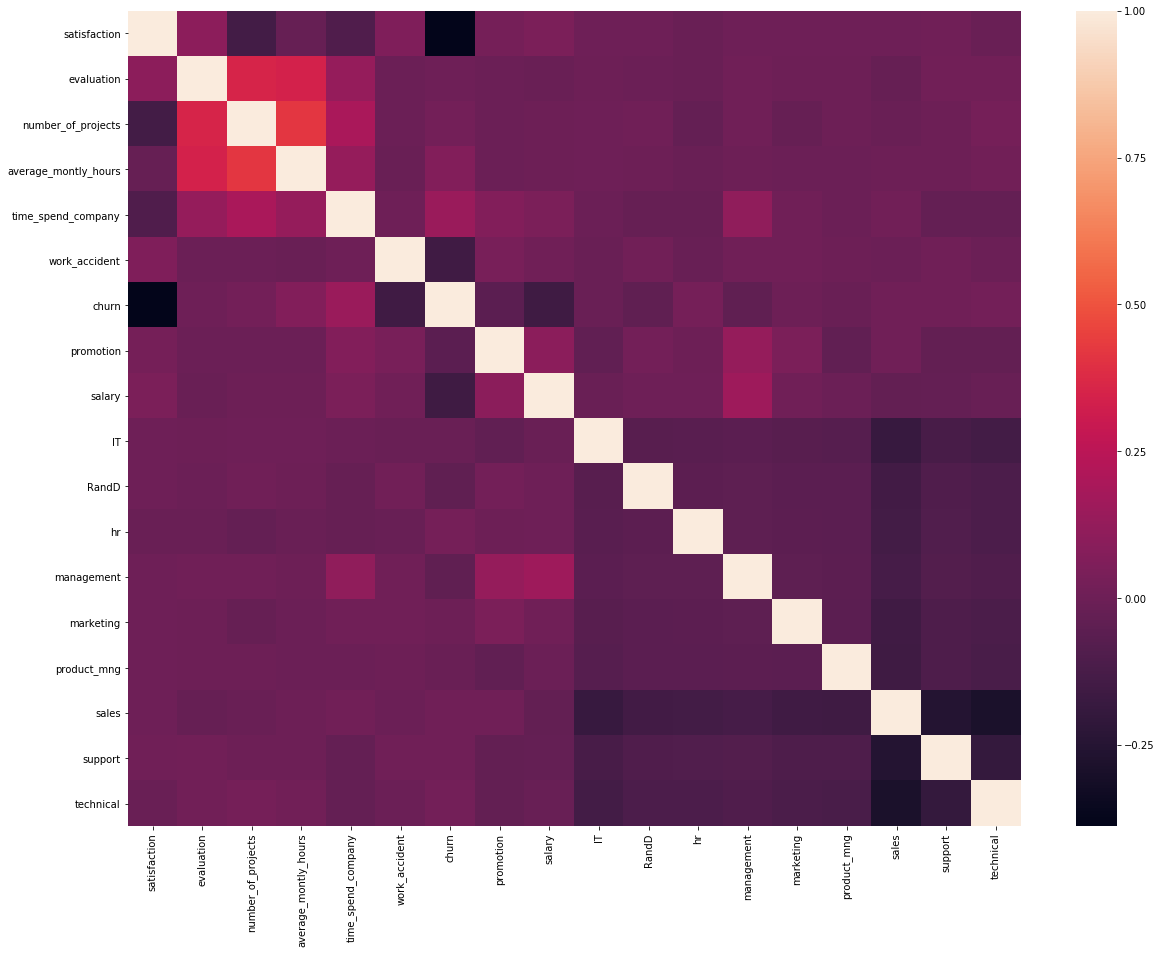

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix=data.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr_matrix)
plt.show()

* not many significant co-relation

### Set the target and features


In [21]:
# Choose the dependent variable column (churn) and set it as target
target = data.churn

In [22]:
# Drop column churn and set everything else as features
features = data.drop("churn",axis=1)

In [23]:
# Import the function for splitting dataset into train and test
from sklearn.model_selection import train_test_split
# Use that function to create the splits both for target and for features
# Set the test sample to be 25% of your observations
target_train, target_test, features_train, features_test = train_test_split(target,features,test_size=0.25,random_state=42)

In [46]:
#number of people who stayed/left
stayed = 37
left = 1138
#sum of stayed and left
total = stayed + left
#gini index
gini = 2*(stayed/total)*(left/total)

In [47]:
# Gini index in case of splitting by variable A or B
gini_A = 0.65
gini_B = 0.15

# check which Gini is lower and use it for spliting
if gini_A< gini_B:
    print("split by A!")
else:
    print("split by B!")

split by B!


In [26]:
# Import the classification algorithm
from sklearn.tree import DecisionTreeClassifier

# Initialize it and call model by specifying the random_state parameter
model = DecisionTreeClassifier(random_state=42)

# Apply a decision tree model to fit features to the target
model.fit(features_train,target_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [27]:
# Apply a decision tree model to fit features to the target in the training set
model.fit(features_train,target_train)

# Check the accuracy score of the prediction for the training set
model.score(features_train,target_train)*100

# Check the accuracy score of the prediction for the test set
model.score(features_test,target_test)*100

97.22666666666666

In [45]:
# Import the graphical visualization export function
from sklearn.tree import export_graphviz

# Apply Decision Tree model to fit Features to the Target
model.fit(features_train,target_train)

# Export the tree to a dot file
export_graphviz(model,"tree.dot")

In [29]:
# Initialize the DecisionTreeClassifier while limiting the depth of the tree to 5
model_depth_5 = DecisionTreeClassifier(max_depth=5, random_state=42)

# Fit the model
model_depth_5.fit(features_train,target_train)

# Print the accuracy of the prediction for the training set
print(model_depth_5.score(features_train,target_train)*100)

# Print the accuracy of the prediction for the test set
print(model_depth_5.score(features_test,target_test)*100)

97.71535247577563
97.06666666666666


In [30]:
# Initialize the DecisionTreeClassifier while limiting the sample size in leaves to 100
model_sample_100 = DecisionTreeClassifier(min_samples_leaf=100, random_state=42)

# Fit the model
model_sample_100.fit(features_train,target_train)

# Print the accuracy of the prediction (in percentage points) for the training set
print(model_sample_100.score(features_train,target_train)*100)

# Print the accuracy of the prediction (in percentage points) for the test set
print(model_sample_100.score(features_test,target_test)*100)

96.57747355320473
96.13333333333334


In [31]:
# Import the function to calculate precision score
from sklearn.metrics import precision_score

# Predict whether employees will churn using the test set
prediction = model.predict(features_test)

# Calculate precision score by comparing target_test with the prediction
precision_score(target_test,prediction)

0.9240641711229947

In [32]:
# Import the function to calculate recall score
from sklearn.metrics import recall_score

# Use the initial model to predict churn
prediction = model.predict(features_test)

# Calculate recall score by comparing target_test with the prediction
recall_score(target_test, prediction)

0.9632107023411371

In [33]:
# Import the function to calculate ROC/AUC score
from sklearn.metrics import roc_auc_score

# Use initial model to predict churn (based on features_test)
prediction = model.predict(features_test)

# Calculate ROC/AUC score by comparing target_test with the prediction
roc_auc_score(target_test, prediction)

0.9691623087590718

In [34]:
# Initialize the DecisionTreeClassifier 
model_depth_5_b = DecisionTreeClassifier(max_depth=5,class_weight="balanced",random_state=42)

# Fit the model
model_depth_5_b.fit(features_train,target_train)

# Print the accuracy of the prediction (in percentage points) for the test set
print(model_depth_5_b.score(features_test,target_test)*100)

93.70666666666668


In [35]:
# Print the recall score
print(recall_score(target_test,prediction))
# Print the ROC/AUC score
print(roc_auc_score(target_test,prediction))

# Initialize the model
model_depth_7_b = DecisionTreeClassifier(max_depth=7,class_weight="balanced",random_state=42)
# Fit it to the training component
model_depth_7_b.fit(features_train,target_train)
# Make prediction using test component
prediction_b = model_depth_7_b.predict(features_test)
# Print the recall score for the balanced model
print(recall_score(target_test,prediction_b))
# Print the ROC/AUC score for the balanced model
print(roc_auc_score(target_test,prediction_b))

0.9632107023411371
0.9691623087590718
0.9319955406911928
0.959863876199084


In [36]:
# Import the function for implementing cross validation
from sklearn.model_selection import cross_val_score

# Use that function to print the cross validation score for 10 folds
print(cross_val_score(model,features,target,cv=10))

[0.9853431  0.98533333 0.974      0.96533333 0.96       0.97933333
 0.99       0.99333333 1.         1.        ]


In [37]:
# Generate values for maximum depth
depth = [i for i in range(5,21,1)]

# Generate values for minimum sample size
samples = [i for i in range(50,500,50)]

# Create the dictionary with parameters to be checked
parameters = dict(max_depth=depth, min_samples_leaf=10)

In [38]:
# import the GridSearchCV function
from sklearn.model_selection import GridSearchCV

# set up parameters: done
parameters = dict(max_depth=depth, min_samples_leaf=samples)

# initialize the param_search function using the GridSearchCV function, initial model and parameters above
param_search = GridSearchCV(model, parameters)

# fit the param_search to the training dataset
param_search.fit(features_train, target_train)

# print the best parameters found
print(param_search.best_params_)

C:\Users\Parth\Anaconda3\envs\python3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_depth': 5, 'min_samples_leaf': 50}
